In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
data_path = 'data'
files = os.listdir(data_path)

# Lista para guardar los DataFrames
dfs = []

# Crear figura para los plots
plt.figure(figsize=(12, 6))

# Leer y plotear cada archivo
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(data_path, file)
        df = pd.read_csv(file_path)

        # Guardar el DataFrame en la lista
        dfs.append(df)

# Concatenar todos los DataFrames
df_total = pd.concat(dfs, ignore_index=True)

df_total


,FECHA,NRO_CAJERO,DISPENSADO,REMANENTE
0,2021-01-01,0,1500900,9494700
1,2021-01-01,1,842300,7954200
2,2021-01-01,2,4134300,7960800
3,2021-01-01,3,657500,34528300
4,2021-01-01,4,16728700,18457200
...,...,...,...,...
78499,2022-12-31,103,110571500,21375400
78500,2022-12-31,104,9041600,48135300
78501,2022-12-31,105,29523200,27653800
78502,2022-12-31,106,19791000,37386000


<Figure size 1200x600 with 0 Axes>

In [27]:
df_total['FECHA'] = pd.to_datetime(df_total['FECHA'])

In [35]:
df_total[df_total['NRO_CAJERO'] == 7].shape[0]-365

358

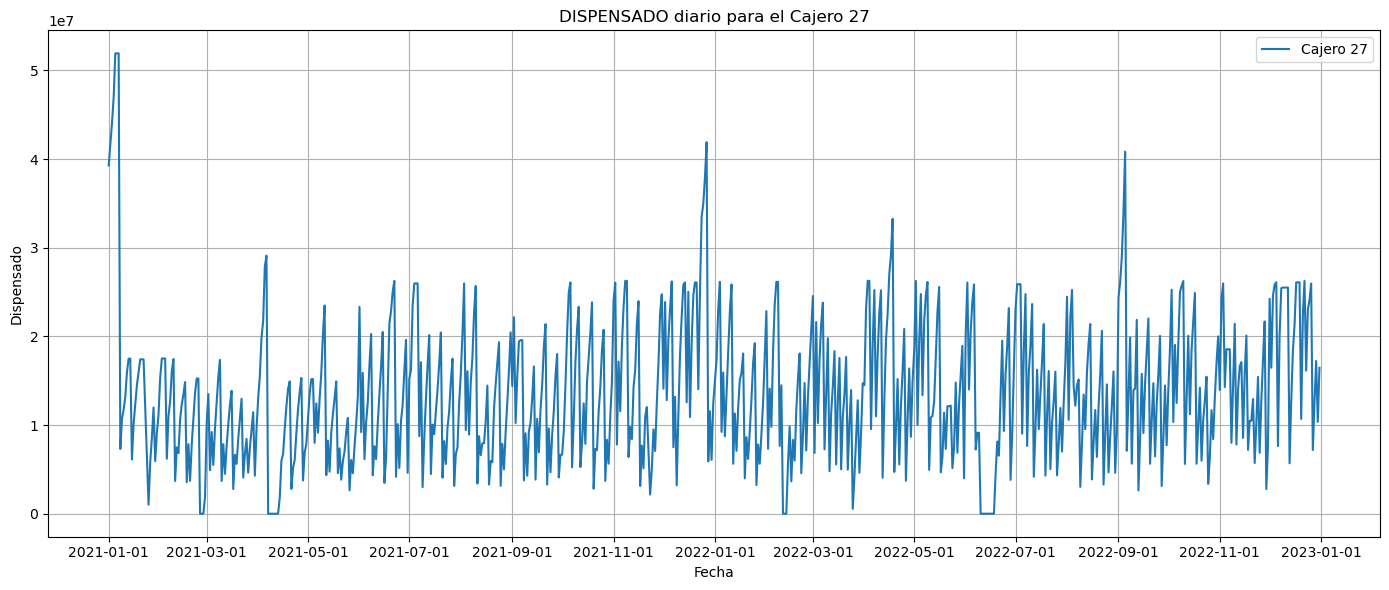

In [52]:
n = 27  # por ejemplo

# Filtrar por cajero n
df_cajero_n = df_total[df_total['NRO_CAJERO'] == n]

# Plotear
plt.figure(figsize=(14, 6))
plt.plot(df_cajero_n['FECHA'], df_cajero_n['DISPENSADO'], label=f'Cajero {n}')


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #Ajuste en el formato de fecha

plt.title(f'DISPENSADO diario para el Cajero {n}')
plt.xlabel('Fecha')
plt.ylabel('Dispensado')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

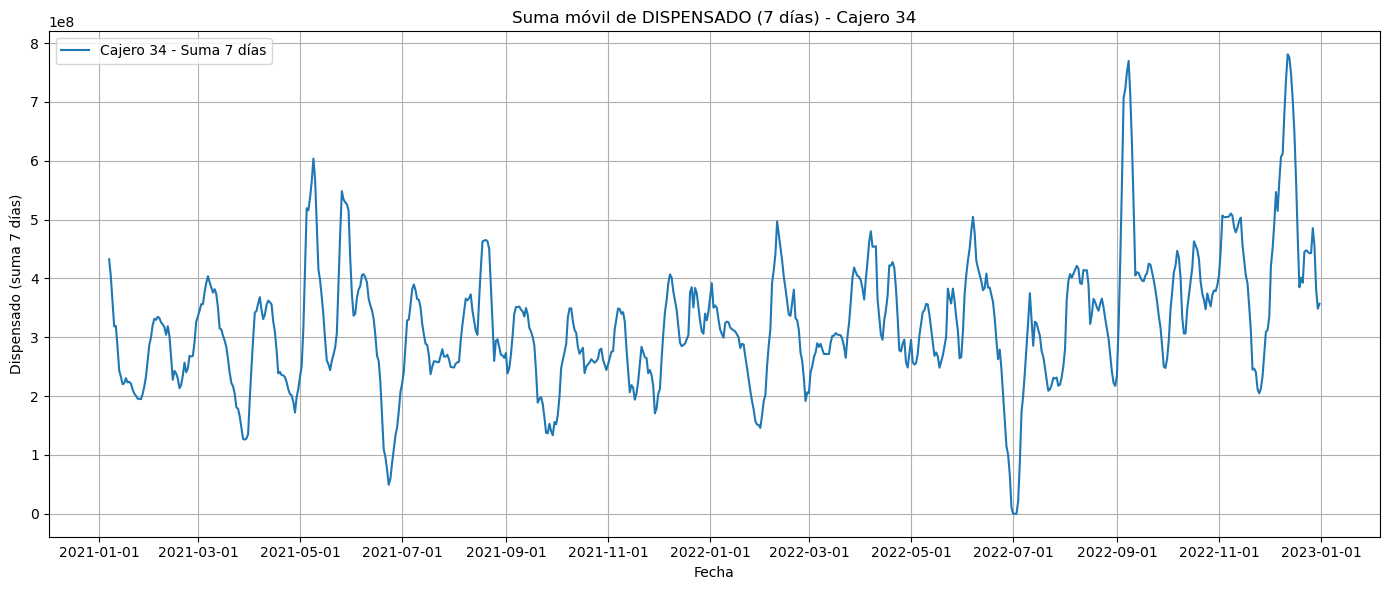

In [51]:
n= 34
 
df_cajero_n = df_total[df_total['NRO_CAJERO'] == n].sort_values('FECHA')

# Asegúrate de que la columna 'FECHA' sea de tipo datetime
df_cajero_n['FECHA'] = pd.to_datetime(df_cajero_n['FECHA'])

DIAS = 7
# Aplicar suma de ventana deslizante de 5 días
# Primero agrupar por fecha si hay múltiples entradas por fecha (opcional según tu estructura)
serie_rolling = df_cajero_n.set_index('FECHA')['DISPENSADO'].rolling(window=DIAS).sum()

# Plotear
plt.figure(figsize=(14, 6))
plt.plot(serie_rolling.index, serie_rolling.values, label=f'Cajero {n} - Suma {DIAS} días')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #Ajuste en el formato de fecha

plt.title(f'Suma móvil de DISPENSADO ({DIAS} días) - Cajero {n}')
plt.xlabel('Fecha')
plt.ylabel(f'Dispensado (suma {DIAS} días)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Variables:
- Interpolacion de data en cajeros que faltan.
- Dia de la semana(one hot enconding)
- Separar fecha en (año, mes, dia)
- Inflacion mensual (se usa la del mes anterior)
- Dias imporantes (navidad, reyes, dia del ñino/madre/padre)
- Media dispensado ultimos dias 3,7,15,30 para predecir dia i+1.

- IDEA: 20% cajero poca plata.


- Clustering de cajeros (NACHO)


Modelo:
- LSTM
- Transformers
- Transfomers finetuneado a nuestra data.
- Ecuaciones diferenciales ¿?